In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v2.pickle'
TRACKS_DST = 'cache/tracks_v2.pickle'
WORMS_DST = 'cache/worms_v2.pickle'
ARTIFACTS_DST = 'cache/artifacts_v2.pickle'

DOTS_AC = 'cache/dots_v2_kl.h5'
TRACKS_AC = 'cache/tracks_v2_kl.h5'
WORMS_AC = 'cache/worms_v2_kl.h5'
ARTIFACTS_AC = 'cache/artifacts_v2_kl.h5'


def train_and_test(train_set, validation_set, fn):

    autoencoder = original_autoencoder(kl=True)
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True, kl=True)

    # test załadowania autoenkodera po zapisaniu
    from keras.models import load_model
    load_model(fn, custom_objects={'kl_divergence': tf.keras.losses.KLDivergence})

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
1290/1290 [==============================] - 48s 30ms/step - loss: 0.0061 - kullback_leibler_divergence: 2.3155e-04 - val_loss: 4.0994e-05 - val_kullback_leibler_divergence: 1.5189e-04
Epoch 2/200
1290/1290 [==============================] - 34s 26ms/step - loss: 2.5453e-05 - kullback_leibler_divergence: 1.1599e-04 - val_loss: 2.1201e-05 - val_kullback_leibler_divergence: 1.7263e-04
Epoch 3/200
1290/1290 [==============================] - 29s 22ms/step - loss: 1.0274e-05 - kullback_leibler_divergence: 6.5523e-05 - val_loss: 1.1851e-05 - val_kullback_leibler_divergence: 8.4768e-05
Epoch 4/200
1290/1290 [==============================] - 33s 25ms/step - loss: 8.1839e-06 - kullback_leibler_divergence: 5.9047e-05 - val_loss: 2.2365e-05 - val_kullback_leibler_divergence: 2.4959e-04
Epoch 5/200
1290/1290 [==============================] - 36s 28ms/step - loss: 7.3360e-06 - kullback_leibler_divergence: 5.2253e-05 

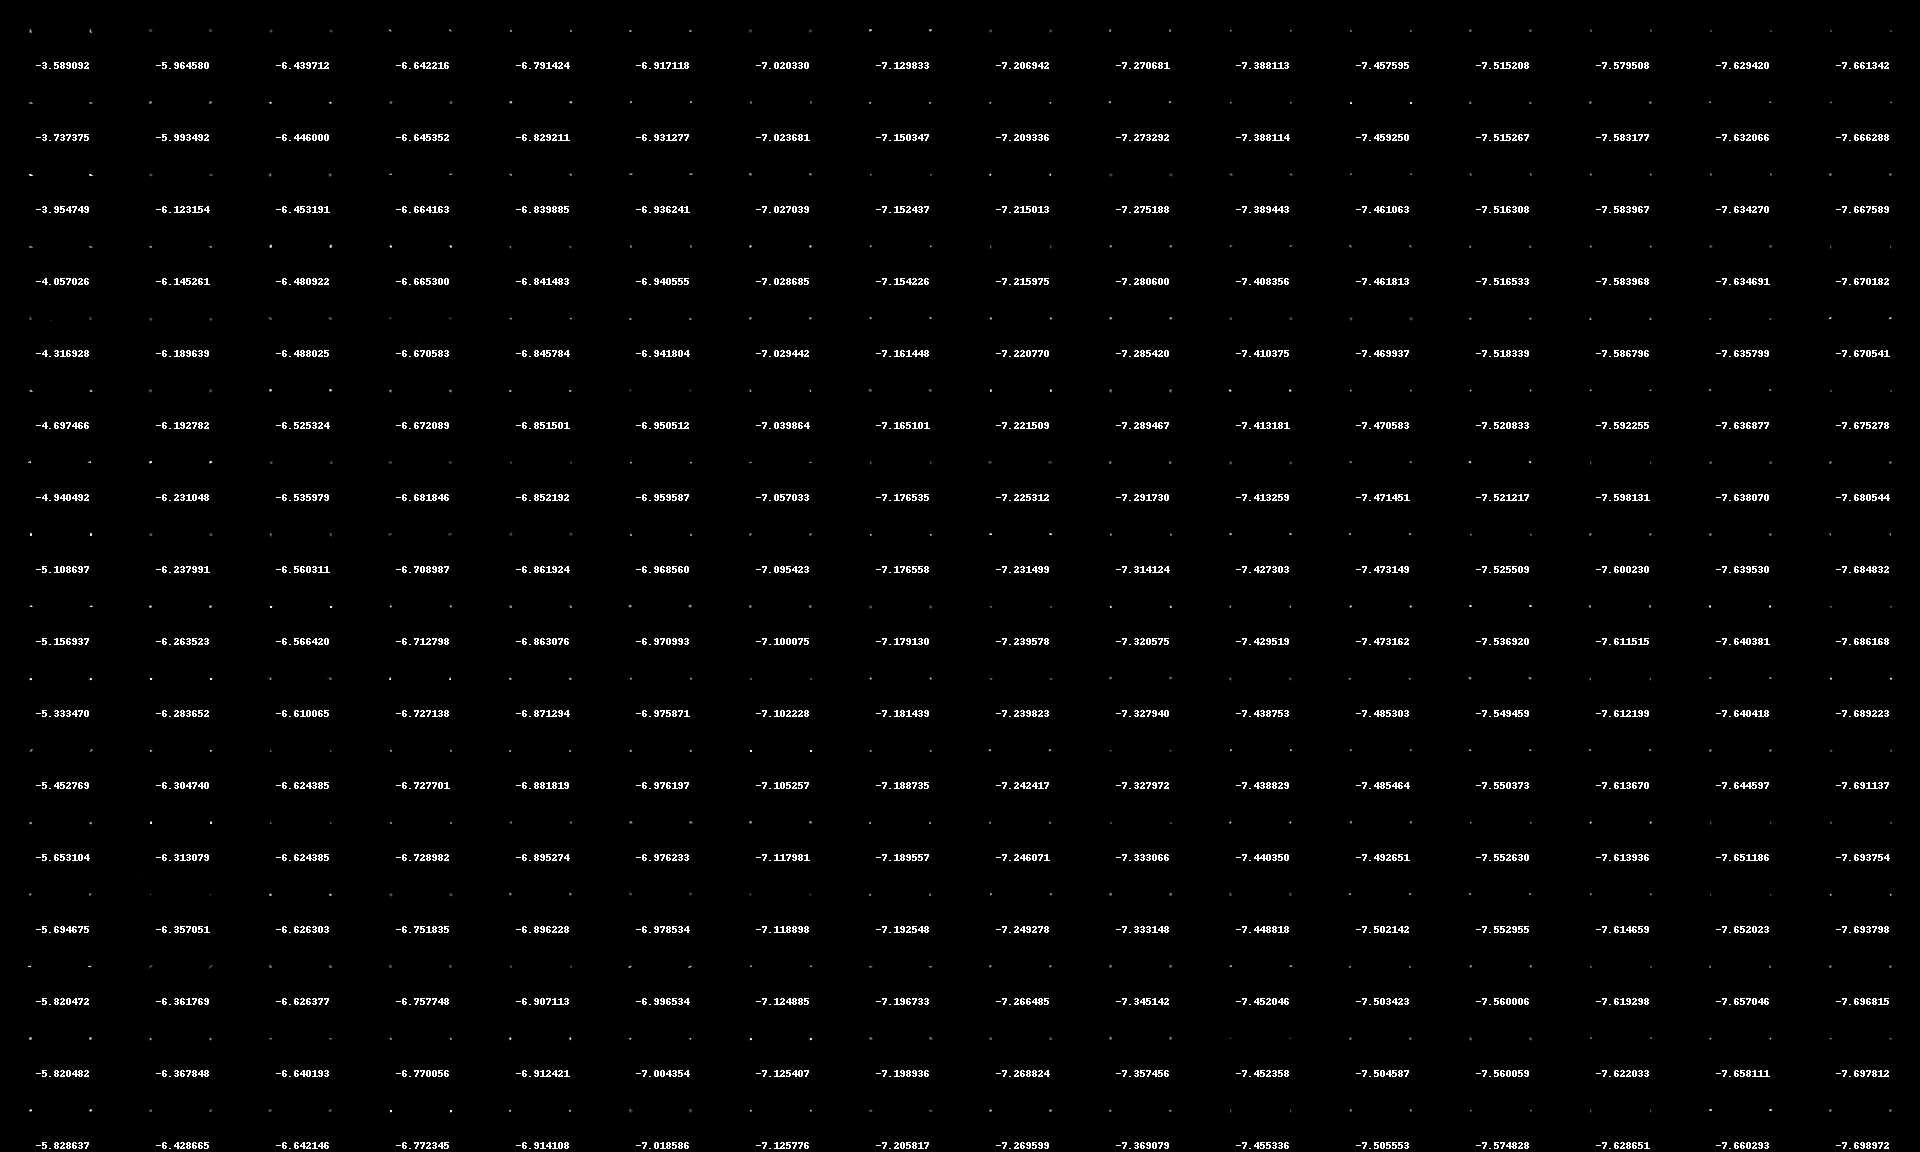

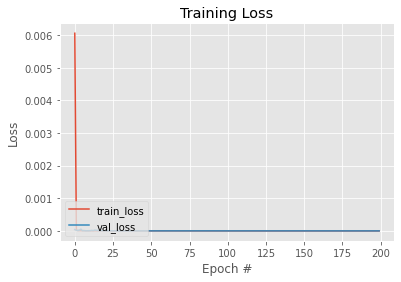

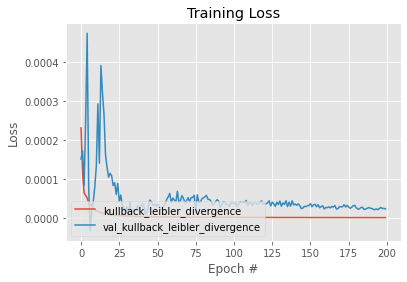

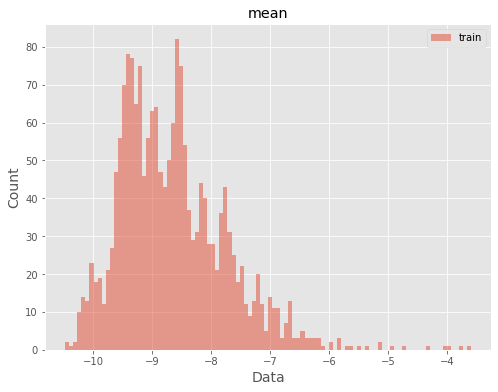

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
2108/2108 [==============================] - 28s 12ms/step - loss: 0.0186 - kullback_leibler_divergence: 0.0014 - val_loss: 0.0160 - val_kullback_leibler_divergence: 5.6455e-04
Epoch 2/200
2108/2108 [==============================] - 26s 12ms/step - loss: 0.0074 - kullback_leibler_divergence: 6.4535e-04 - val_loss: 1.3096e-04 - val_kullback_leibler_divergence: 8.2844e-04
Epoch 3/200
2108/2108 [==============================] - 26s 12ms/step - loss: 6.4959e-05 - kullback_leibler_divergence: 4.3580e-04 - val_loss: 7.1041e-05 - val_kullback_leibler_divergence: 4.5494e-04
Epoch 4/200
2108/2108 [==============================] - 26s 12ms/step - loss: 5.8662e-05 - kullback_leibler_divergence: 4.0387e-04 - val_loss: 6.1824e-05 - val_kullback_leibler_divergence: 3.9638e-04
Epoch 5/200
2108/2108 [==============================] - 27s 13ms/step - loss: 5.3154e-05 - kullback_leibler_divergence: 3.4991e-04 - val_loss: 

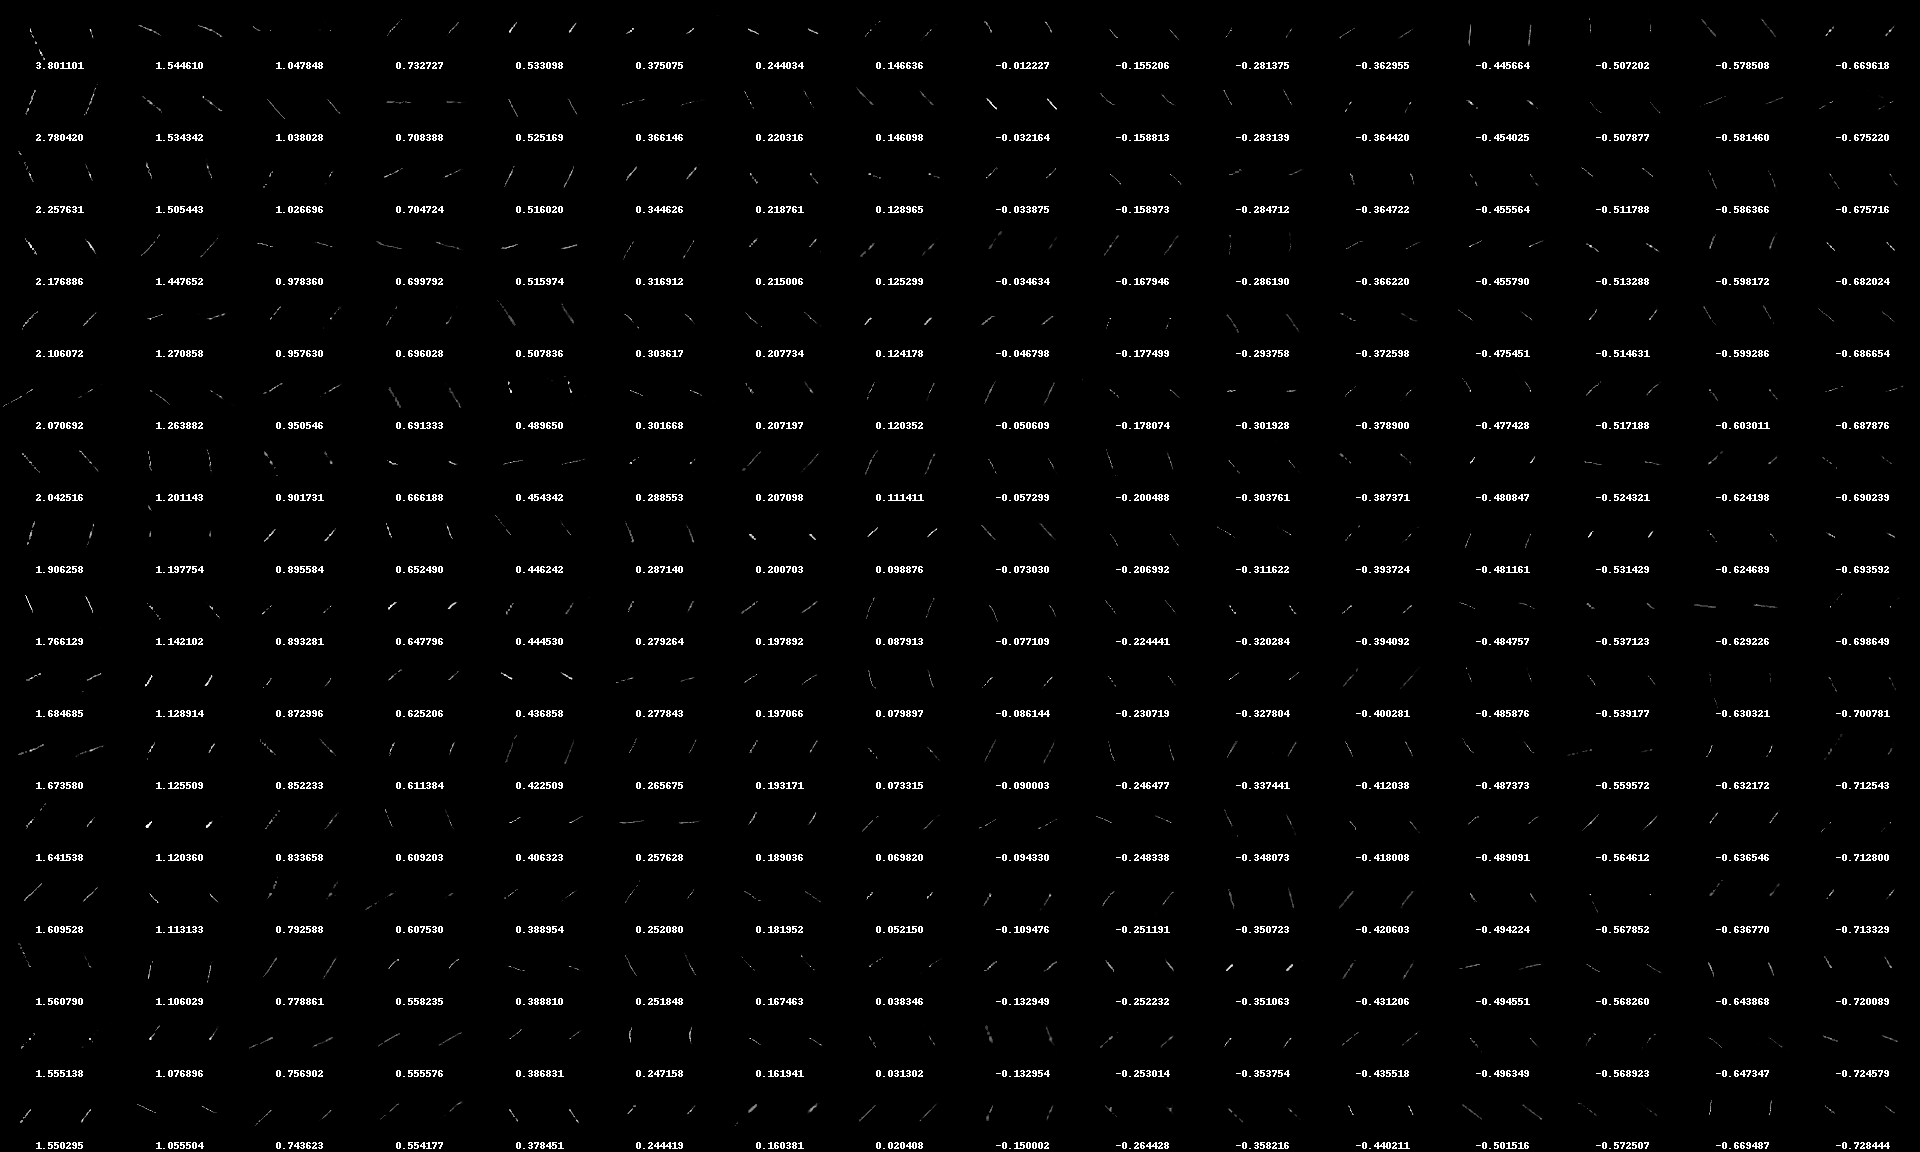

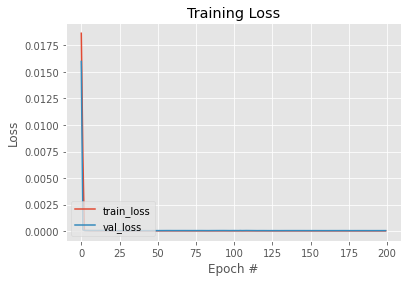

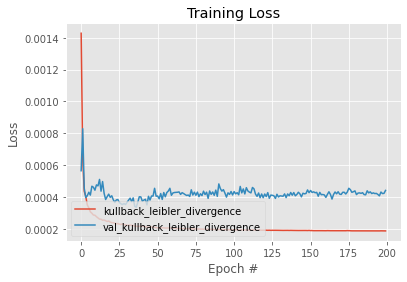

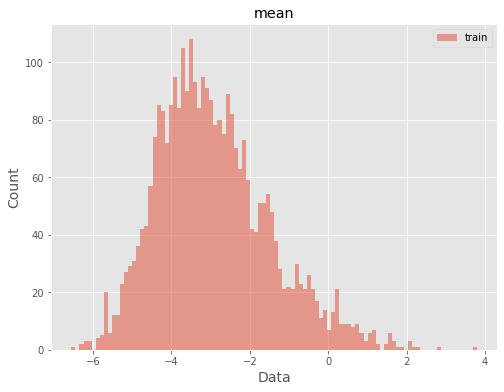

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0312 - kullback_leibler_divergence: 0.0031 - val_loss: 0.0166 - val_kullback_leibler_divergence: 0.0056
Epoch 2/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0158 - kullback_leibler_divergence: 0.0043 - val_loss: 0.0159 - val_kullback_leibler_divergence: 0.0062
Epoch 3/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0147 - kullback_leibler_divergence: 0.0033 - val_loss: 0.0134 - val_kullback_leibler_divergence: 0.0039
Epoch 4/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0086 - kullback_leibler_divergence: 0.0047 - val_loss: 0.0081 - val_kullback_leibler_divergence: 0.0123
Epoch 5/200
341/341 [==============================] - 4s 11ms/step - loss: 7.0490e-04 - kullback_leibler_divergence: 0.0039 - val_loss: 8.6280e-04 - val_kullback_leibler_divergence: 0.0043
Epoch 6/200
34

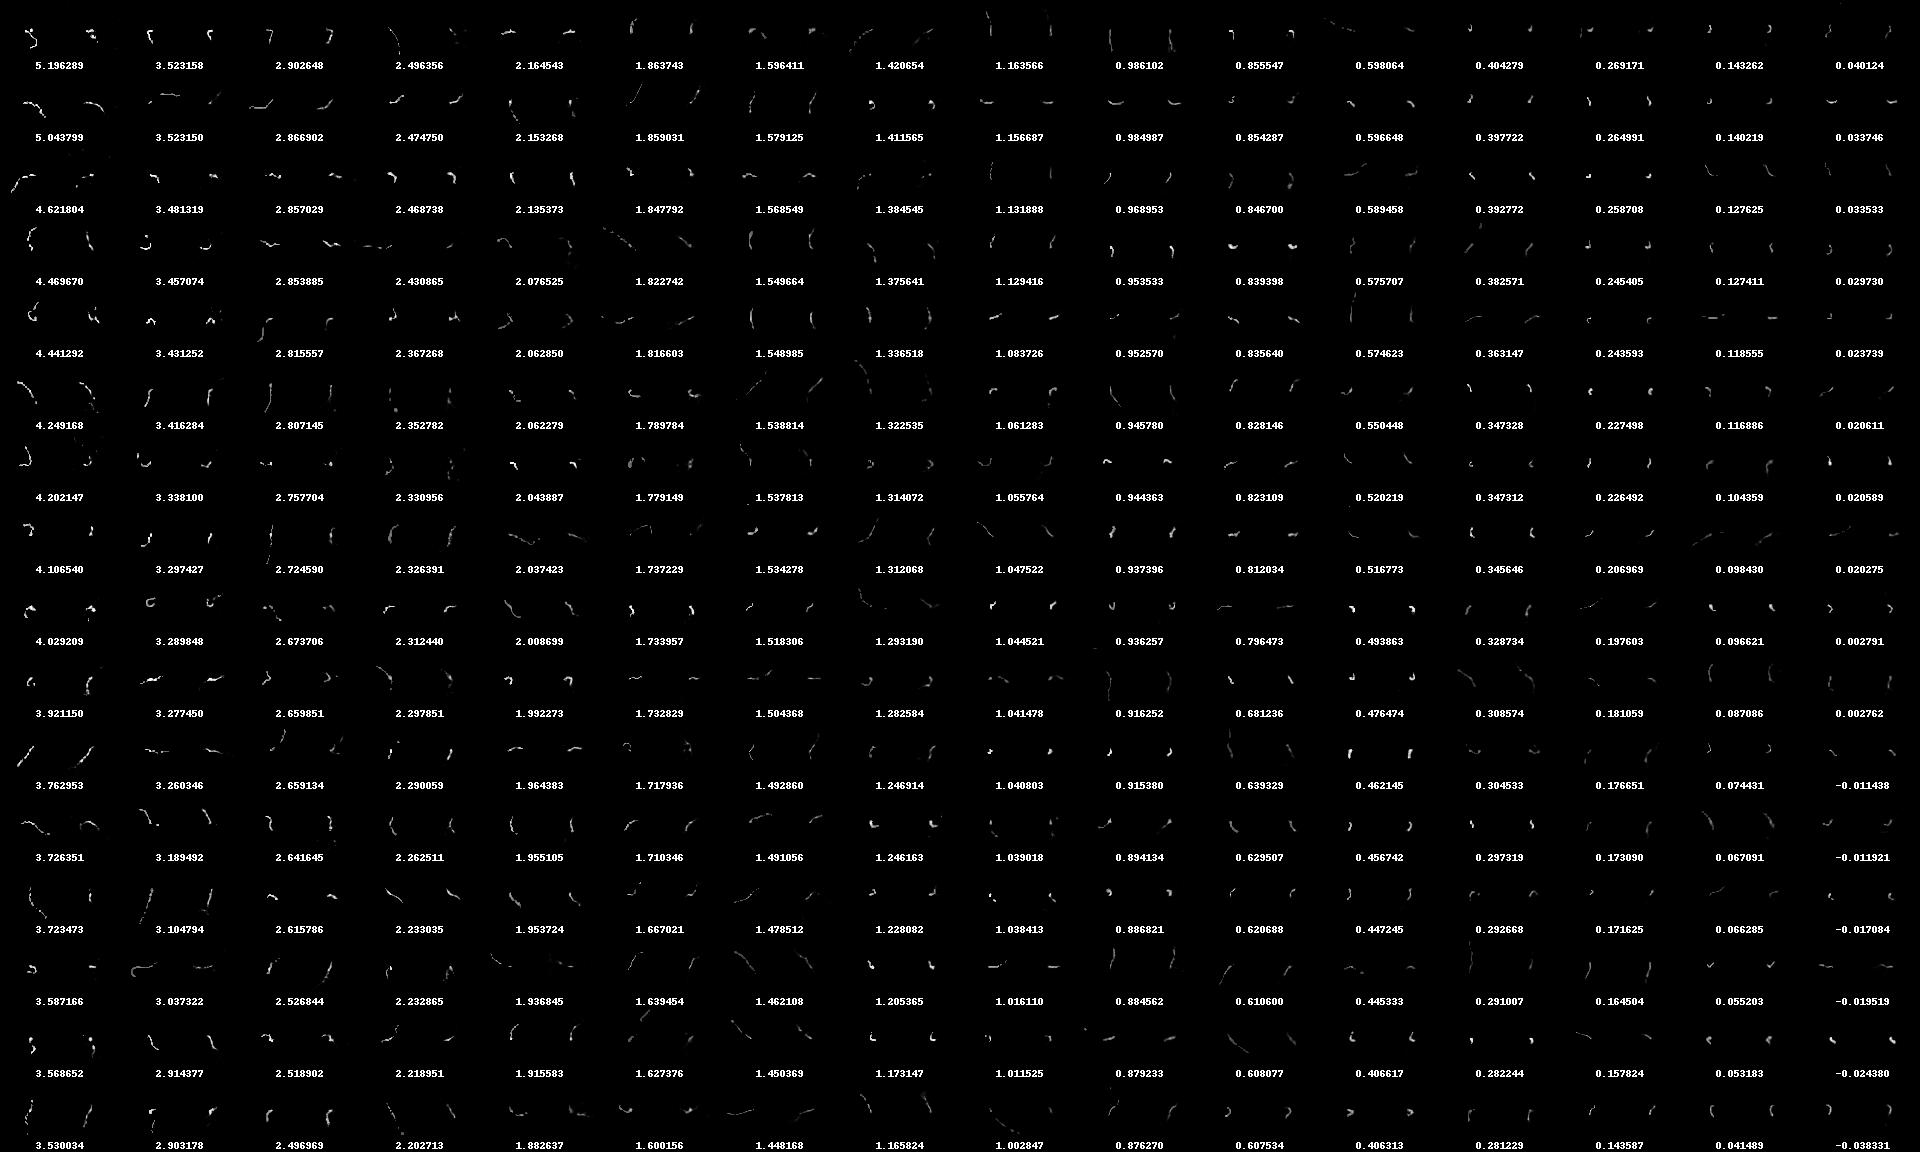

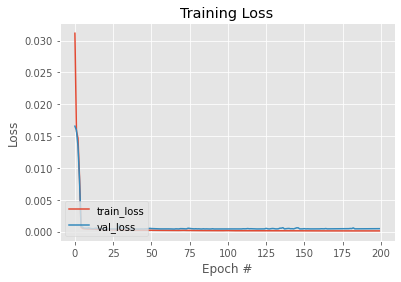

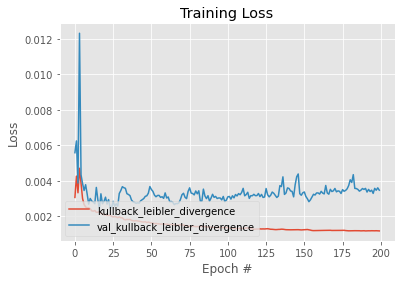

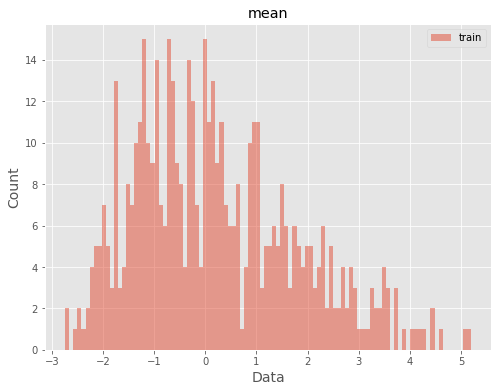

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
445/445 [==============================] - 7s 12ms/step - loss: 0.0228 - kullback_leibler_divergence: 0.0034 - val_loss: 0.0011 - val_kullback_leibler_divergence: 0.0076
Epoch 2/200
445/445 [==============================] - 5s 12ms/step - loss: 6.0657e-04 - kullback_leibler_divergence: 0.0039 - val_loss: 9.2284e-04 - val_kullback_leibler_divergence: 0.0093
Epoch 3/200
445/445 [==============================] - 5s 12ms/step - loss: 4.3934e-04 - kullback_leibler_divergence: 0.0032 - val_loss: 7.8661e-04 - val_kullback_leibler_divergence: 0.0071
Epoch 4/200
445/445 [==============================] - 5s 12ms/step - loss: 3.6535e-04 - kullback_leibler_divergence: 0.0028 - val_loss: 6.6475e-04 - val_kullback_leibler_divergence: 0.0054
Epoch 5/200
445/445 [==============================] - 5s 12ms/step - loss: 3.5782e-04 - kullback_leibler_divergence: 0.0027 - val_loss: 5.0639e-04 - val_kullback_leibler_divergenc

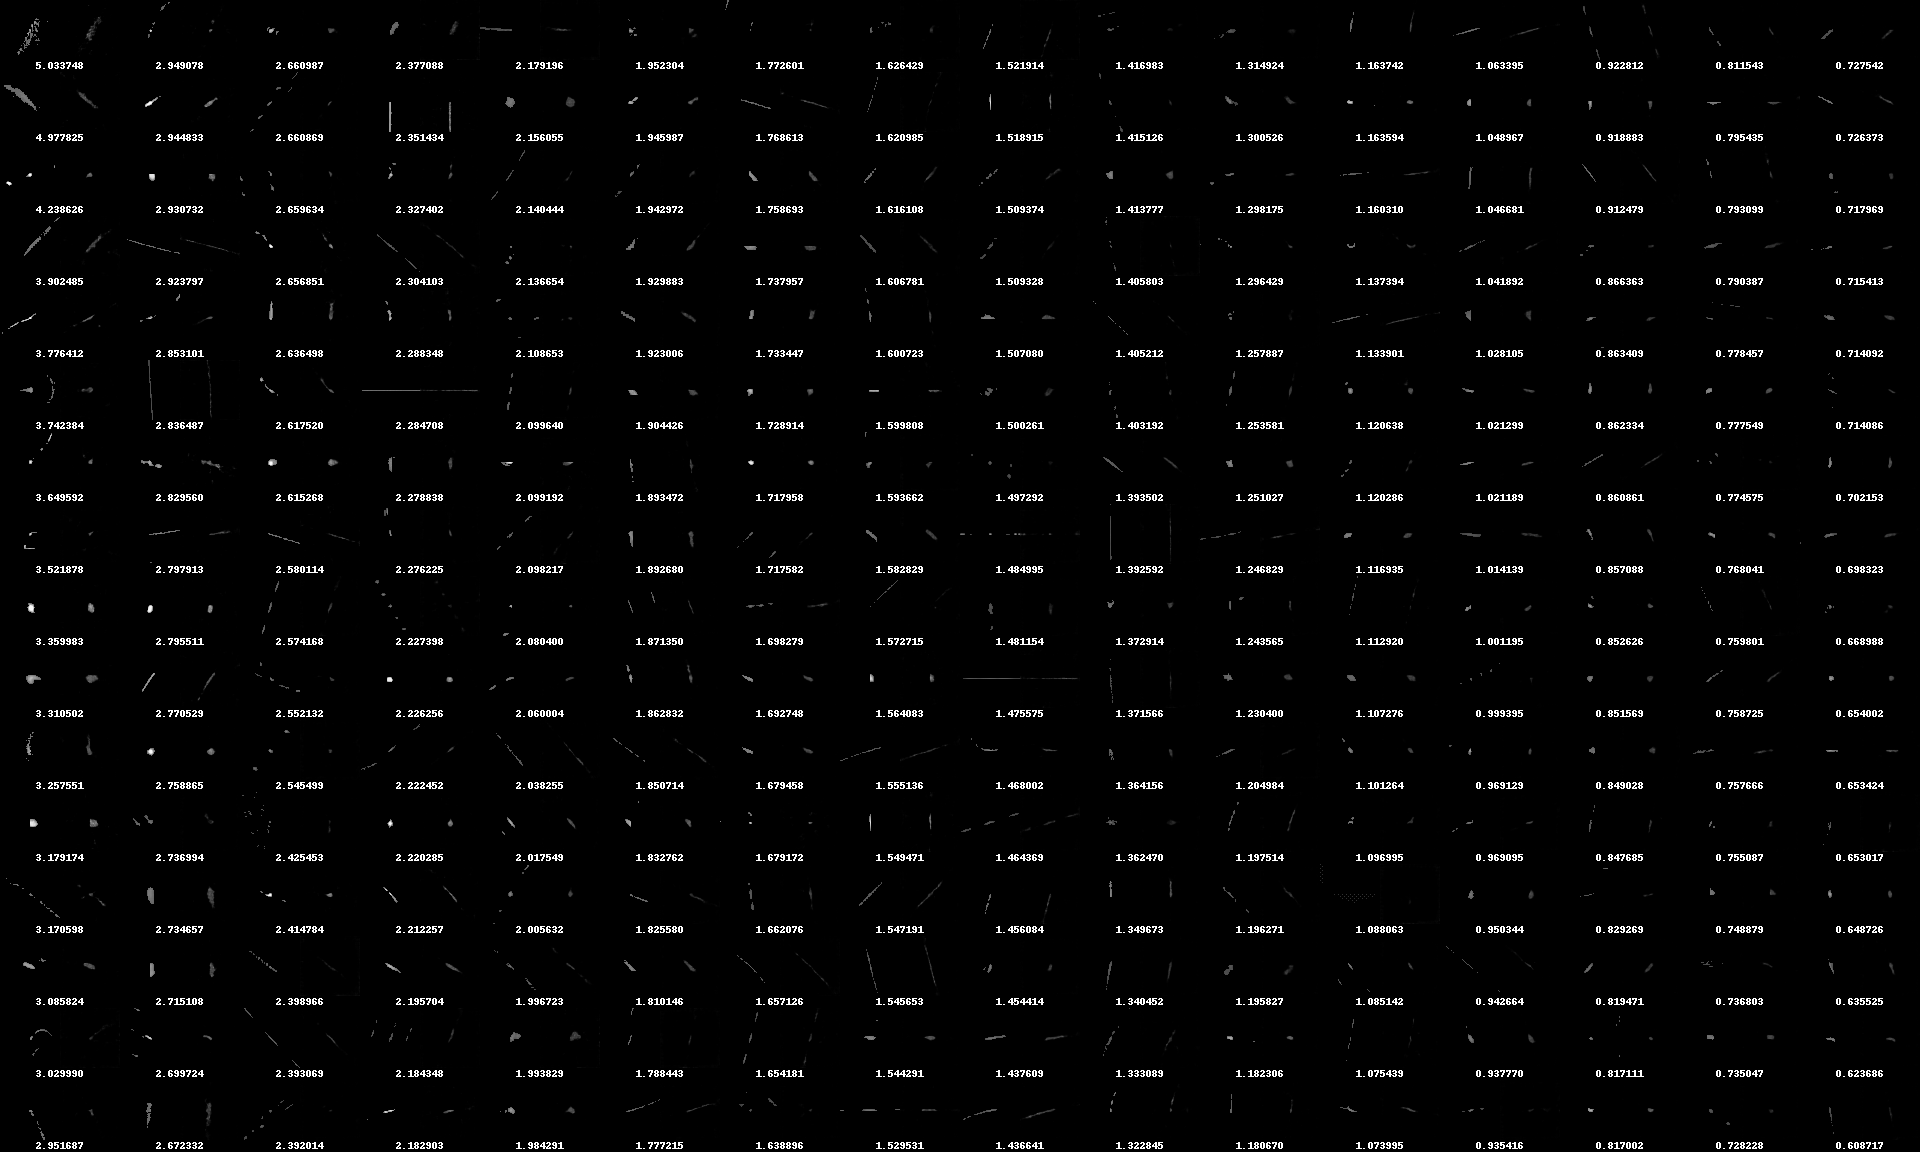

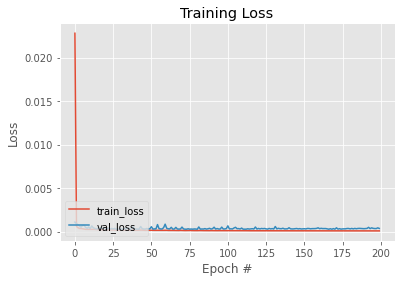

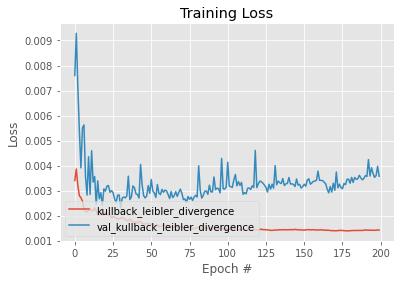

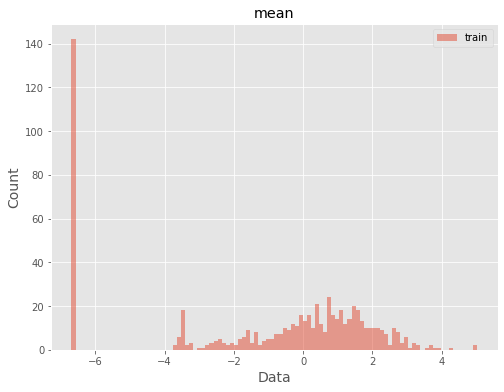

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)